# Tai Duc Nguyen (tdn47)

# Answer to homework 3

# 1.1 
`Theory`

[Code](#1.1-Theory)

## a)

First, we find the determinant of $C - \lambda I$ to get the 2 eigen values from the solution of the quadratic equation:

```
eig_vals = solv_eig_val_2x2(data_C)
Eigen values: (1.6142729428888276, 0.6079492793333952)
```

Second, we use the 2 eigen values to solve for 2 eigen vectors. Here, it's stacked column-wise:

```
eig_vec = solv_eig_vec(data_C, eig_vals)
```

Then finally, we normalize both eigen vectors:

```
eig_vec[:,0] = norm_vec(eig_vec[:,0])
eig_vec[:,1] = norm_vec(eig_vec[:,1])

```

Which, we get:
```
Eigen vectors: 
[[ 0.6992951  0.7148331]
 [-0.7148331  0.6992951]]
```

Here are the function used to solve the steps above:
```
solv_quad = lambda a, b, c: ((-b + np.sqrt(b**2 - 4*a*c))/2*a, (-b - np.sqrt(b**2 - 4*a*c))/2*a)
solv_eig_val_2x2 = lambda A: solv_quad(1, -(A[0,0] + A[1,1]), (A[0,0]*A[1,1] - A[0,1]*A[1,0]))
solv_eig_vec = lambda A, V: np.array([[1, -(A[0,0] - V[0])/(A[0,1])], [1, -(A[0,0] - V[1])/(A[0,1])]]).T
norm_vec = lambda V: V/np.sqrt(V.T @ V)
```

## b)

Projecting the data on the the primary principal component by:
```
proj_1D = data @ eig_vec[:,0]
```

Which we get:

```
array([-0.50302024, -0.15100073, -0.6697674 , -0.51043032, -3.20802512,
       -1.18482902,  0.16767341,  1.00511423,  0.34553569,  0.83095699])
```

# 1.2 
`Theory`

[Code](#1.2-Theory)


## a)

Info gains={'x1': 0.8, 'x2': 0.7245112497836532}


## b)

Feature 1 (x1) is more discriminative


## c)

The steps are:
1. Get mean of each feature for class 0
2. Get mean of each feature for class 1
3. Calculate the covariance matrix for class 0
4. Calculdate the covariance matrix for class 1
5. Calculate the scatter matrix for class 0 from its covariance matrix
6. Calculate the scatter matrix for class 1 from its covariance matrix
7. Get the within-class-scatter matrix by summing the 2 scatter matrices above
8. Get the between-class-scatter matrix using the 2 means matrices above

```
mean_0 = np.mean(data_df[data_df['Y'] == 0].drop(['Y'], axis=1))
mean_1 = np.mean(data_df[data_df['Y'] == 1].drop(['Y'], axis=1))
cov_mat_0 = cov_mat(data_df[data_df['Y'] == 0].drop(['Y'], axis=1))
cov_mat_1 = cov_mat(data_df[data_df['Y'] == 1].drop(['Y'], axis=1))
scatter_mat_0 = (len(data_df[data_df['Y'] == 0]) - 1) * cov_mat_0
scatter_mat_1 = (len(data_df[data_df['Y'] == 1]) - 1) * cov_mat_1
scatter_within = scatter_mat_0 + scatter_mat_1
scatter_between = np.array(mean_0 - mean_1).reshape(2,1) @ np.array(mean_0 - mean_1).reshape(1,2)
```

```
Scatter between matrix:
           x1         x2
x1  10.000000  -4.082622
x2  -4.082622  10.000000

Scatter within matrix:
[[ 1.81230578 -0.6640409 ]
 [-0.6640409   0.243309  ]]
```


9. Calculate the product of the inverse within-class-scatter matrix with the between-class-scatter matrix
10. Calculate the eigen values and vectors using the product matrix above

```
E, V = np.linalg.eig(np.linalg.inv(scatter_within) @ scatter_between)
print(V[:,0])
[0.99879099 0.04915855]


```

## d)

Projecting the data on to the primary eigen vector:

```
proj_data = data_df.drop(['Y'], axis=1) @ V[:,0]
```

Which we get:
```
0   -0.278748
1   -1.086363
2   -0.527746
3    0.243497
4   -1.651498
5   -0.230252
6    0.456123
7    1.439993
8   -0.078246
9    1.713239
dtype: float64
```

## e)

The plot of the projected data is here:
[Scatter plot of projected data](#2.e.-Scatter-plot-projected-data)

This plot shows that the projection does not provide good class separation because there are 2 points of each class which essentially overlaps on one another and the `within class distance` after projection is still large, almost as large as the distance `between` classes.

This is verified by the plot of the original data below. By initial scanning, there are essentially no lines which can give good separability after projection 

[Scatter plot of original data](#2.e.-Scatter-plot-original-data)

# 2. 
`Dimensionality Reduction via PCA`

[Code](#2.-Dimensionality-Reduction-via-PCA)

Sk-learn KNN accuracy (k=1) = 0.23256

My implementation of KNN's accuracy = 0.23255813953488372

Applying my KNN implementation on PCA with 100 components gives accuracy = 0.25387596899224807

After whitening, Applying my KNN implementation on PCA with 100 components gives accuracy = 0.3313953488372093

Here is the plot of PC1 and PC2:

[PC1-PC2 plot](#2.-PC1-PC2-plot)


# 3. 
`Eigenfaces`

[Code](#3.-Eigenfaces)

Here are the faces that the max and min of the first 2 PCs correspond to (in plot, PC0 is the primary and PC1 is the secondary): 

[Max and min of PC1 and PC2](#3.-Visualizing-max-and-min-of-PC0-and-PC1-after-projection-on-X_train)

It is seen that PC1 captures the overall brightness and PC2 captures if the face is bright on the left half or on the right half

Here is what PC1 captures as a 87x65 image:

[What PC1 capture](#3.-Visualize-what-PC0-captures)


Here are the reconstruction images. From left to right: Using only PC1, using **188 PCs** (95%), Original

[Reconstruction](#3.-Reconstruction)

# 4. 
`Clustering`

[Code](#4.-Clustering)

The Kmeans algorithm ran for 29 iterations then coverges (Change < 2e-23):

```
Iter: 1, Change: 442.5361633300781
Iter: 2, Change: 128.02601623535156
Iter: 3, Change: 78.1665267944336
Iter: 4, Change: 44.924957275390625
Iter: 5, Change: 29.543842315673828
Iter: 6, Change: 22.499788284301758
Iter: 7, Change: 16.453794479370117
Iter: 8, Change: 14.850354194641113
Iter: 9, Change: 12.765664100646973
Iter: 10, Change: 10.536905288696289
Iter: 11, Change: 9.19281005859375
Iter: 12, Change: 7.387046813964844
Iter: 13, Change: 7.967870235443115
Iter: 14, Change: 7.730221748352051
Iter: 15, Change: 5.344476699829102
Iter: 16, Change: 4.699371337890625
Iter: 17, Change: 4.794102191925049
Iter: 18, Change: 4.1309685707092285
Iter: 19, Change: 4.912514686584473
Iter: 20, Change: 2.7934107780456543
Iter: 21, Change: 1.4903690814971924
Iter: 22, Change: 1.528502345085144
Iter: 23, Change: 1.1923229694366455
Iter: 24, Change: 1.993759274482727
Iter: 25, Change: 2.0061607360839844
Iter: 26, Change: 1.9300038814544678
Iter: 27, Change: 4.196130275726318
Iter: 28, Change: 2.5771408081054688
Iter: 29, Change: 1.7259509563446045
```

Here is the visualization of the algorithm's results:

[4. The visualization of k-means cluster centers, and the min and max images](#4.-The-visualization-of-k-means-cluster-centers,-and-the-min-and-max-images)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1.1 Theory

In [2]:
data = np.array([
    [-2, 1],
    [-5, -4],
    [-3, 1],
    [0, 3],
    [-8, 11],
    [-2, 5],
    [1, 0],
    [5, -1],
    [-1, -3],
    [6, 1]
])

In [3]:
standardize = lambda X: (X - np.mean(X))/np.std(X)

In [4]:
data = standardize(data)

In [5]:
data_C = (data.T @ data)/(data.shape[0] - 1)
data_C

array([[ 1.10005528, -0.50304035],
       [-0.50304035,  1.12216694]])

In [6]:
solv_quad = lambda a, b, c: ((-b + np.sqrt(b**2 - 4*a*c))/2*a, (-b - np.sqrt(b**2 - 4*a*c))/2*a)
solv_eig_val_2x2 = lambda A: solv_quad(1, -(A[0,0] + A[1,1]), (A[0,0]*A[1,1] - A[0,1]*A[1,0]))
solv_eig_vec = lambda A, V: np.array([[1, -(A[0,0] - V[0])/(A[0,1])], [1, -(A[0,0] - V[1])/(A[0,1])]]).T
norm_vec = lambda V: V/np.sqrt(V.T @ V)

In [7]:
eig_vals = solv_eig_val_2x2(data_C)
print(f"Eigen values: {eig_vals}")
eig_vec = solv_eig_vec(data_C, eig_vals)
eig_vec[:,0] = norm_vec(eig_vec[:,0])
eig_vec[:,1] = norm_vec(eig_vec[:,1])
print(f"Eigen vectors: \n{eig_vec}")

Eigen values: (1.6142729428888276, 0.6079492793333952)
Eigen vectors: 
[[ 0.6992951  0.7148331]
 [-0.7148331  0.6992951]]


In [9]:
proj_1D = data @ eig_vec[:,0]
proj_1D

array([-0.50302024, -0.15100073, -0.6697674 , -0.51043032, -3.20802512,
       -1.18482902,  0.16767341,  1.00511423,  0.34553569,  0.83095699])

# 1.2 Theory

In [10]:
data = np.array([
    [-2, 1, 0],
    [-5, -4, 0],
    [-3, 1, 0],
    [0, 3, 0],
    [-8, 11, 0],
    [-2, 5, 1],
    [1, 0, 1],
    [5, -1, 1],
    [-1, -3, 1],
    [6, 1, 1]
])

data_df = pd.DataFrame(data, columns=['x1', 'x2', 'Y'])
data_df

,x1,x2,Y
0,-2,1,0
1,-5,-4,0
2,-3,1,0
3,0,3,0
4,-8,11,0
5,-2,5,1
6,1,0,1
7,5,-1,1
8,-1,-3,1
9,6,1,1


In [11]:
data_df['x1'] = standardize(data_df['x1'])
data_df['x2'] = standardize(data_df['x2'])
data_df

,x1,x2,Y
0,-0.274230,-0.098653,0
1,-1.022129,-1.331812,0
2,-0.523530,-0.098653,0
3,0.224370,0.394611,0
4,-1.770029,2.367665,0
5,-0.274230,0.887875,1
6,0.473670,-0.345285,1
7,1.470869,-0.591916,1
8,-0.024930,-1.085180,1
9,1.720169,-0.098653,1


In [13]:
cross_entropy = lambda x: -x*np.log2(x)

In [55]:
total = len(data_df)
E_Y_pos = cross_entropy(len(data_df[data_df['Y'] == 1])/total)
E_Y_neg = cross_entropy(len(data_df[data_df['Y'] == 0])/total)
E_Y = E_Y_pos + E_Y_neg
print(f"Sample Entropy={E_Y:.4f}")

Sample Entropy=1.0000


In [56]:
info_gains = {'x1': 0, 'x2': 0}
for feature in info_gains:
    entropy = 0
    for val in set(data_df[feature]):
        t = len(data_df[data_df[feature] == val])
        p = len(data_df[(data_df[feature] == val) & (data_df['Y'] == 1)])
        n = t-p
        if t > 0 and p*n > 0:
            entropy += (t/total)*(cross_entropy(p/t) + cross_entropy(n/t))
    info_gains[feature] = E_Y - entropy

print(f"Info gains={info_gains}")

Info gains={'x1': 0.8, 'x2': 0.7245112497836532}


In [16]:
cov_mat = lambda M: (M.T @ M)/(M.shape[0] - 1)

In [57]:
mean_0 = np.mean(data_df[data_df['Y'] == 0].drop(['Y'], axis=1))
mean_1 = np.mean(data_df[data_df['Y'] == 1].drop(['Y'], axis=1))
cov_mat_0 = cov_mat(data_df[data_df['Y'] == 0].drop(['Y'], axis=1))
cov_mat_1 = cov_mat(data_df[data_df['Y'] == 1].drop(['Y'], axis=1))
scatter_mat_0 = (len(data_df[data_df['Y'] == 0]) - 1) * cov_mat_0
scatter_mat_1 = (len(data_df[data_df['Y'] == 1]) - 1) * cov_mat_1
scatter_within = scatter_mat_0 + scatter_mat_1
scatter_between = np.array(mean_0 - mean_1).reshape(2,1) @ np.array(mean_0 - mean_1).reshape(1,2)

print(scatter_within)
print(scatter_between)

           x1         x2
x1  10.000000  -4.082622
x2  -4.082622  10.000000
[[ 1.81230578 -0.6640409 ]
 [-0.6640409   0.243309  ]]


In [58]:
E, V = np.linalg.eig(np.linalg.inv(scatter_within) @ scatter_between)
print(V[:,0])

proj_data = data_df.drop(['Y'], axis=1) @ V[:,0]
proj_data

[0.99879099 0.04915855]


0   -0.278748
1   -1.086363
2   -0.527746
3    0.243497
4   -1.651498
5   -0.230252
6    0.456123
7    1.439993
8   -0.078246
9    1.713239
dtype: float64

## 2.e. Scatter plot projected data

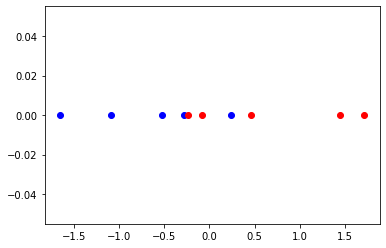

In [59]:
plt.scatter(proj_data[:5], np.zeros((1,5)), c='b')
plt.scatter(proj_data[5:], np.zeros((1,5)), c='r')

## 2.e. Scatter plot original data

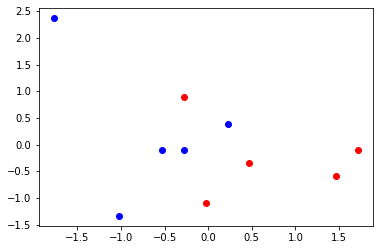

In [60]:
plt.scatter(data_df.loc[data_df['Y'] == 0, 'x1'], data_df.loc[data_df['Y'] == 0, 'x2'], c = 'b')
plt.scatter(data_df.loc[data_df['Y'] == 1, 'x1'], data_df.loc[data_df['Y'] == 1, 'x2'], c = 'r')

# 2. Dimensionality Reduction via PCA

In [21]:
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

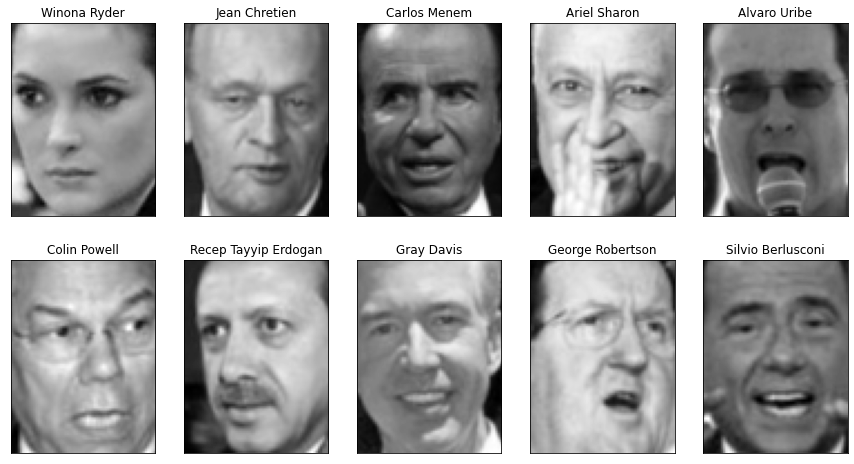

In [22]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people /= 255

In [24]:
# See how well KNN does with just the pixels alone
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [61]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=8)
knn.fit(X_train, y_train)
print(f"Test set score of 1-nn: {knn.score(X_test, y_test):.5f}")

Test set score of 1-nn: 0.23256


In [26]:
euclid = lambda a, b: np.linalg.norm(a-b)

In [27]:
def KNN(X_train, y_train, X_test, num_neighbors):
    distances = []
    predictions = []
    for i, test_row in enumerate(X_test):
        distances.clear()
        for j, train_row in enumerate(X_train):
            dist = euclid(test_row, train_row)
            distances.append((j, dist))
        distances.sort(key=lambda tup: tup[1])
        neighbors = list(list(zip(*distances))[0])[:num_neighbors]
        predictions.append(max(set(neighbors), key=neighbors.count))
    return y_train[np.array(predictions)]

In [28]:
%time y_test_pred = KNN(X_train, y_train, X_test, 1)

CPU times: user 6.88 s, sys: 251 µs, total: 6.88 s
Wall time: 6.88 s


In [29]:
sum(y_test_pred - y_test == 0)/len(y_test)

0.23255813953488372

In [30]:
def PCA(data, n_components=100):
    C = cov_mat(data)
    E, V = np.linalg.eig(C)
    return E[:n_components], V[:,:n_components]

In [31]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [32]:
%time E, V = PCA(X_train_std, X_train_std.shape[1])
X_train_proj = X_train_std @ V[:,:100]
X_test_proj = X_test_std @ V[:,:100]

CPU times: user 12min 4s, sys: 10min 23s, total: 22min 28s
Wall time: 1min 49s


In [33]:
%time y_test_pred = KNN(X_train_proj, y_train, X_test_proj, 1)

CPU times: user 5.04 s, sys: 854 ms, total: 5.89 s
Wall time: 4.94 s


In [34]:
sum(y_test_pred - y_test == 0)/len(y_test)

0.25387596899224807

In [35]:
X_train_proj_white = X_train_proj @ np.diag(1/np.sqrt(E[:100]))
X_test_proj_white = X_test_proj @ np.diag(1/np.sqrt(E[:100]))

In [36]:
%time y_test_pred = KNN(X_train_proj_white, y_train, X_test_proj_white, 1)

CPU times: user 5.27 s, sys: 728 ms, total: 5.99 s
Wall time: 5.05 s


In [37]:
sum(y_test_pred - y_test == 0)/len(y_test)

0.3313953488372093

## 2. PC1-PC2 plot

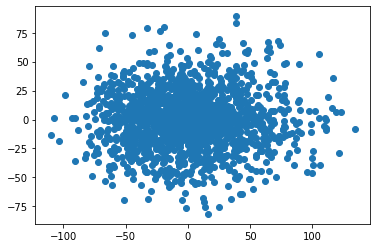

In [38]:
plt.scatter(X_train_proj[:,0], X_train_proj[:,1])

# 3. Eigenfaces

In [39]:
X_train_proj_all = X_train_std @ V
X_test_proj_all = X_test_std @ V

In [40]:
pc0 = X_train_proj_all[:,0]
pc1 = X_train_proj_all[:,1]

pc0_max, pc0_min = np.argmax(pc0), np.argmin(pc0)
pc1_max, pc1_min = np.argmax(pc1), np.argmin(pc1)

## 3. Visualizing max and min of PC0 and PC1 after projection on X_train

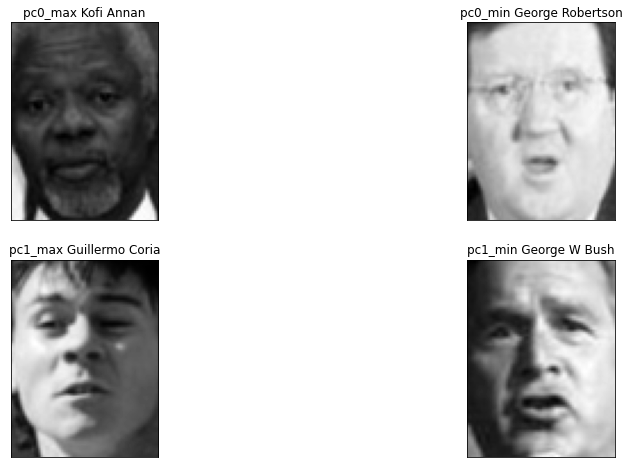

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})

for i, t, ax in zip([pc0_max, pc0_min, pc1_max, pc1_min], ["pc0_max", "pc0_min", "pc1_max", "pc1_min"], axes.ravel()):
    ax.imshow(X_train[i].reshape(87, 65), cmap=cm.gray)
    ax.set_title(f"{t} {people.target_names[y_train[i]]}")

## 3. Visualize what PC0 captures

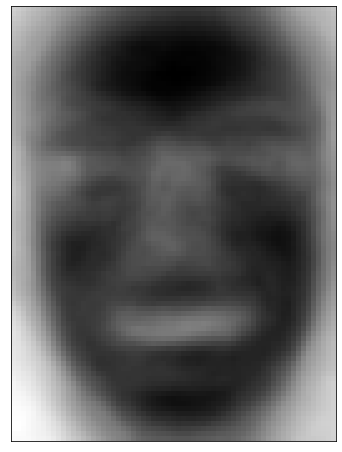

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
axes.imshow(V[:,0].reshape(87, 65), cmap=cm.gray)

In [43]:
def PCA_recon(imgs_proj, V, k, variance, mean):
    img = imgs_proj[:,:k].reshape(-1, k)
    recon_img = img @ (V[:,:k].T.reshape(k, -1))
    recon_img = recon_img * np.sqrt(variance) + mean
    return recon_img

In [44]:
encode_E = 0
sum_E = np.sum(E)
n_components = 0
for n_components in range(len(E)):
    encode_E += E[n_components]
    if encode_E / sum_E > 0.95:
        break
print(n_components)

188


## 3. Reconstruction

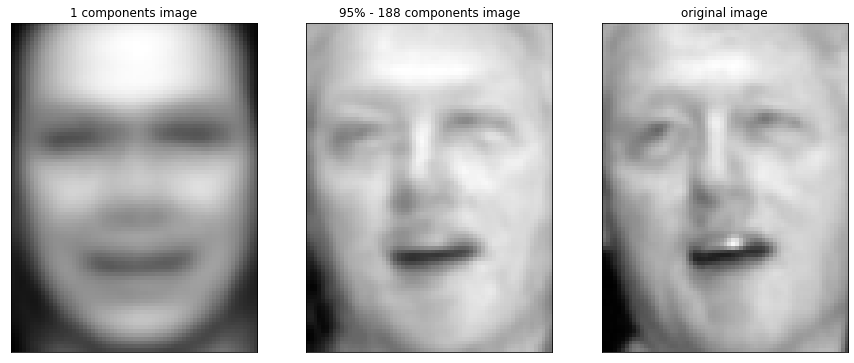

In [45]:
recon_img_1_comp = PCA_recon(X_train_proj_all, V, 1, scaler.var_, scaler.mean_)
recon_img_95 = PCA_recon(X_train_proj_all, V, n_components, scaler.var_, scaler.mean_)
original_img = X_train

fig, axes = plt.subplots(1, 3, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for i, t, ax in zip([recon_img_1_comp, recon_img_95, original_img], ["1 components", f"95% - {n_components} components", "original"], axes.ravel()):
    ax.imshow(i[0,:].reshape(87, 65), cmap=cm.gray)
    ax.set_title(f"{t} image")

# 4. Clustering

In [46]:
def assign_points_to_clusters(centroids, dataset):
    clusters = []
    distances = []
    for i, point in enumerate(dataset):
        distances.clear()
        for j, centroid in enumerate(centroids):
            dist = euclid(point, centroid)
            distances.append((j, dist))
        distances.sort(key=lambda tup: tup[1])
        clusters.append(distances[0][0])
    return np.array(clusters)

In [47]:
def calc_new_centroids(clusters, dataset):
    new_centroids = []
    for c in set(clusters):
        points_in_cluster = np.where(clusters == c)
        cluster_mean = dataset[points_in_cluster].mean(axis=0)
        new_centroids.append(cluster_mean)
    return np.array(new_centroids)

In [48]:
def calc_centroids_diff(old_C, new_C):
    dists = []
    for i in range(len(old_C)):
        dists.append(euclid(old_C[i], new_C[i]))
    return np.sum(dists)

In [49]:
# standardize the data:
scaler_all = StandardScaler().fit(X_people)
X_people_std = scaler_all.transform(X_people)

In [50]:
%time E, V = PCA(X_people_std, n_components=100)
X_people_proj = X_people_std @ V

CPU times: user 11min 29s, sys: 11min 11s, total: 22min 41s
Wall time: 1min 54s


In [51]:
np.random.seed(0)

In [52]:
# randomly choose k points as k centroids
centroids_change = 100
eps = 2e-23
k = 10
itr = 1
max_itr = 10000
centroids = X_people_proj[np.random.randint(0, X_people_proj.shape[0], size=k)]
new_centroids = None

while True:
    clusters = assign_points_to_clusters(centroids, X_people_proj)
    new_centroids = calc_new_centroids(clusters, X_people_proj)
    centroids_change = calc_centroids_diff(centroids, new_centroids)

    if centroids_change < eps or itr > max_itr:
        break

    centroids = new_centroids
    print(f"Iter: {itr}, Change: {centroids_change}")
    itr += 1


Iter: 1, Change: 442.5361633300781
Iter: 2, Change: 128.02601623535156
Iter: 3, Change: 78.1665267944336
Iter: 4, Change: 44.924957275390625
Iter: 5, Change: 29.543842315673828
Iter: 6, Change: 22.499788284301758
Iter: 7, Change: 16.453794479370117
Iter: 8, Change: 14.850354194641113
Iter: 9, Change: 12.765664100646973
Iter: 10, Change: 10.536905288696289
Iter: 11, Change: 9.19281005859375
Iter: 12, Change: 7.387046813964844
Iter: 13, Change: 7.967870235443115
Iter: 14, Change: 7.730221748352051
Iter: 15, Change: 5.344476699829102
Iter: 16, Change: 4.699371337890625
Iter: 17, Change: 4.794102191925049
Iter: 18, Change: 4.1309685707092285
Iter: 19, Change: 4.912514686584473
Iter: 20, Change: 2.7934107780456543
Iter: 21, Change: 1.4903690814971924
Iter: 22, Change: 1.528502345085144
Iter: 23, Change: 1.1923229694366455
Iter: 24, Change: 1.993759274482727
Iter: 25, Change: 2.0061607360839844
Iter: 26, Change: 1.9300038814544678
Iter: 27, Change: 4.196130275726318
Iter: 28, Change: 2.57714

In [53]:
report_imgs = []

for i, C in enumerate(new_centroids):
    report_imgs.append(C)
    points_in_cluster = np.where(clusters == i)[0]
    distances = []
    for j, p in enumerate(points_in_cluster):
        distances.append((j, euclid(X_people_proj[p], C)))
    distances.sort(key=lambda tup: tup[1])
    closest = distances[0][0]
    farthest = distances[-1][0]
    report_imgs.append(X_people_proj[points_in_cluster[closest]])
    report_imgs.append(X_people_proj[points_in_cluster[farthest]])

report_imgs = np.array(report_imgs)
recon_imgs_100_comp = PCA_recon(report_imgs, V, 100, scaler_all.var_, scaler_all.mean_)

## 4. The visualization of k-means cluster centers, and the min and max images

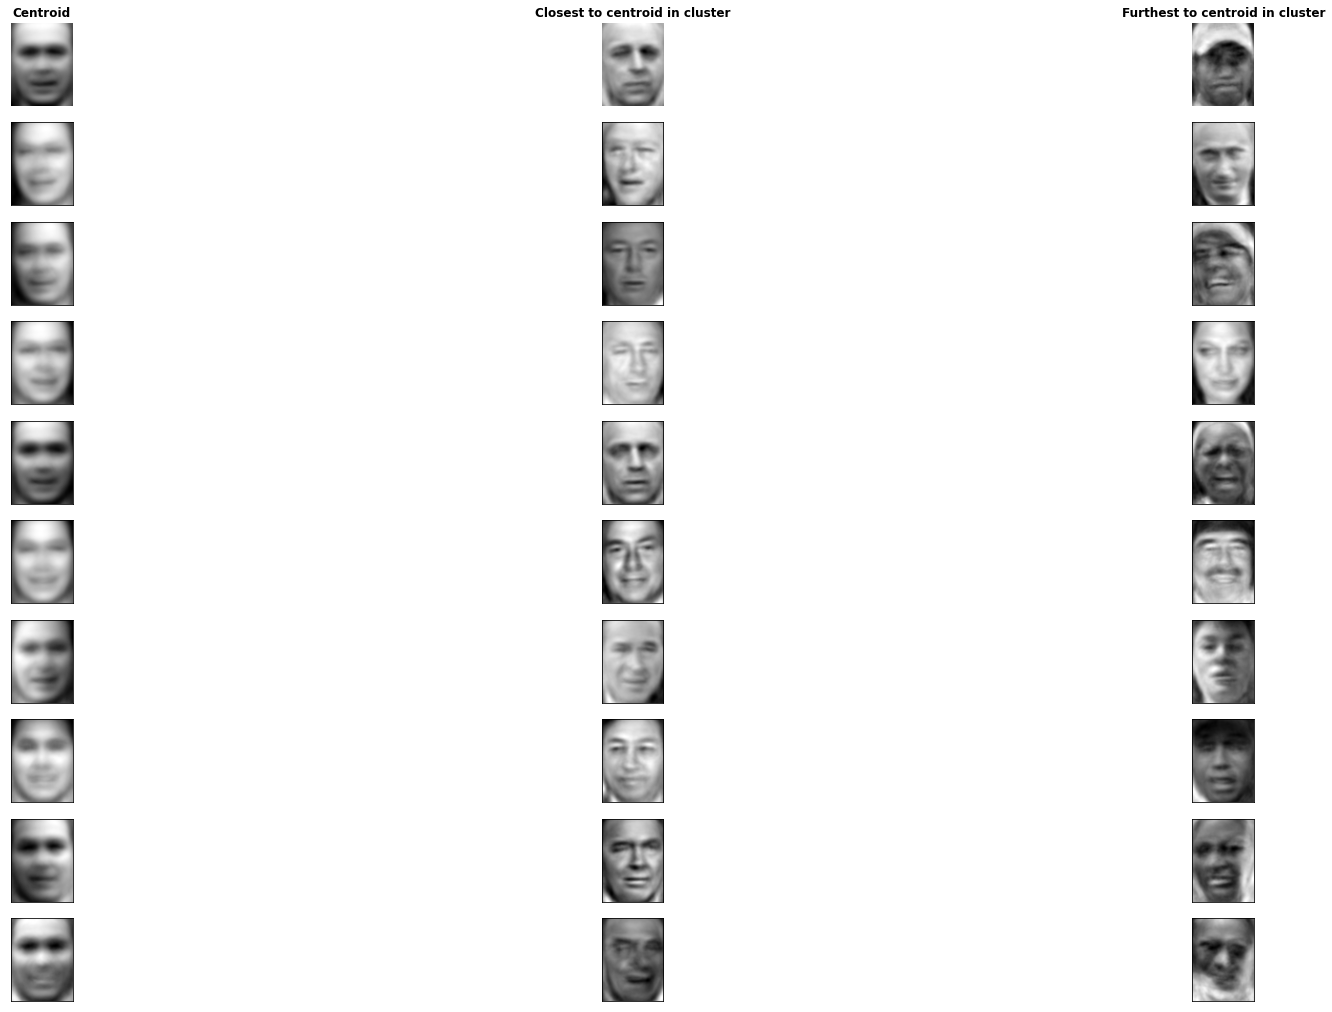

In [54]:
fig, axes = plt.subplots(10, 3, figsize=(30,18), subplot_kw={'xticks': (), 'yticks': ()})


for i, ax in zip(recon_imgs_100_comp, axes.ravel()):
    ax.imshow(i.reshape(87, 65), cmap=cm.gray)

for title, ax in zip(["Centroid", "Closest to centroid in cluster", "Furthest to centroid in cluster"], axes.flatten()[:3]):
    ax.axis("off")
    ax.set_title(f"{title}", fontweight='bold')